In [ ]:

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/330k-arabic-sentiment-reviews/arabic_sentiment_reviews.csv


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# to run more than output in the same cell
pd.set_option('display.max_colwidth', None)


In [ ]:
df = pd.read_csv(os.path.join(dirname, filename))
df.head()

,label,content
0,1,النعال المريحة: أرتدي هذه النعال كثيرًا!فهي دافئة ومريحة وبأسعار معقولة لجودة رائعة.زوجي وأنا على حد سواء لدينا زوج ونحن نحبهم!
1,1,منتج جميل ، خدمة سيئة: لقد اشتريت زوجًا من النعال الباو الدب.باتباع إرشادات وصف المنتج ، ارتفعت حجمًا للتناسب.عندما وصلوا ، كانوا لطيفين حقًا وأحبوا.كانت كبيرة جدا.حاولت إعادة ترتيب ولم تكن متوفرة.حاولت الاتصال بـ Claussette عبر الهاتف وقيل لها البريد الإلكتروني.لقد أرسلت عبر البريد الإلكتروني معضلي وانتظرت أسبوعًا ، ولم ترد ، لقد أرسلت رسالتي الإلكترونية مرة أخرى ، قبل ثلاثة أيام.لا يوجد استجابة.أريد فقط استبدال العنصر ، أو الحصول على إجابة.
2,1,جيد للأشياء الصغيرة: هذا يعمل بشكل جيد لالتقاط قطع صغيرة من المجوهرات ، ولكن الذهاب ببطء.إنه مفيد ، لكن المغناطيس ليس قويًا جدًا.
3,0,واهية للغاية: flimsyif للغاية ، فأنت تشتريه ، كن حذرًا جدًا للغاية مع إطالة وتقصيره ، وأي استخدام على الإطلاق على الإطلاق.(بلا ​​مزاح)
4,1,Pop for Girls and Girly Boys ، والأشخاص الذين يحبون الضحك: عليك فقط أن تبتسم عندما تستمع إلى Book of Love ، وهم فرقة كلها هناك ، وهم ممتعون عندما لا تأخذهم إلى جادة.ليس عليك أن تكون مثليًا للاستمتاع بموسيقى ولكنها ستساعد ، أو على الأقل ودية.شرائه فقط للابتسام ، وشعر بالدوار والغموض في الداخل.


## This cell removes non-Arabic characters from the text data in the content column and creates a new column cleaned_content with the cleaned text.

In [ ]:
import re
arabic_pattern = re.compile(r'[^أ-يء \s]+')
def remove_non_arabic(text):
    return arabic_pattern.sub('', text)

df['content'] = df['content'].apply(lambda str : str.replace(".", " ").strip())
df['cleaned_content'] = df['content'].apply(remove_non_arabic)

## This cell balances the dataset by ensuring an equal number of samples for each class. It then shuffles the dataset to avoid any bias and prints the new class ((((distribution)))).

In [ ]:
# Get class counts
class_counts = df["label"].value_counts()
print("Original Class Distribution:\n", class_counts)

# Calculate half the dataset size
total_size = len(df) // 2

# Determine the maximum number of samples per class while keeping balance
samples_per_class = total_size // len(class_counts)

# Sample from each class equally
df_balanced = df.groupby("label").apply(lambda x: x.sample(n=samples_per_class, random_state=42)).reset_index(drop=True)

# Shuffle the dataset to avoid ordering bias
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Print new class distribution
print("Reduced Class Distribution:\n", df_balanced["label"].value_counts())
df = df_balanced
df.describe().iloc[0]
df.head()

Original Class Distribution:
 label
1    166853
0    163147
Name: count, dtype: int64
Reduced Class Distribution:
 label
0    82500
1    82500
Name: count, dtype: int64


<ipython-input-6-b319e797ff44>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby("label").apply(lambda x: x.sample(n=samples_per_class, random_state=42)).reset_index(drop=True)


label    165000.0
Name: count, dtype: float64

,label,content,cleaned_content
0,0,ما يسمى 2 Pack Louis de Funes: إحدى الحزم تحتوي على أفلام تحتوي على القليل جدًا من Louis de Funes ، ويتصرف في حالة من القلقات الصغيرة جدًا كلتا الحزمتين باللغة الفرنسية تمامًا فقط بدون ترجمة لأي لغة أخرى على الإطلاق بخيبة أمل كبيرة في حين أن كل أقراص DVD أخرى لديها ترجمات نصح بالبقاء واضحًا ما لم يكن المرء يجيد الفرنسية,ما يسمى إحدى الحزم تحتوي على أفلام تحتوي على القليل جدا من ويتصرف في حالة من القلقات الصغيرة جدا كلتا الحزمتين باللغة الفرنسية تماما فقط بدون ترجمة لأي لغة أخرى على الإطلاق بخيبة أمل كبيرة في حين أن كل أقراص أخرى لديها ترجمات نصح بالبقاء واضحا ما لم يكن المرء يجيد الفرنسية
1,0,كان يمكن أن يكون مضحكا ، ولكن لا : التمثيل الرهيب ، وكوبا هي الفائز في الأكاديمية السابقة؟هذا أمر مفرط في الإفراط في الإحراج ، ناهيك عن الإحراج - وهذا أمر جيد بالنسبة لنماذج Feautering ، ولكن بالنسبة للجهات الفاعلة الجادة مثل كوبا ، فهذا ليس كذلك كان من الممكن أن يكون اثنان من جنسين مختلفين يصطدمان بمثليي الجنس ، لكن التمثيل السيئ الذي تليه مؤامرة غبية لقصة يجعلها واحدة من أقل الكوميديا المضحكة التي رأيتها على الإطلاق آسف كوبا,كان يمكن أن يكون مضحكا ولكن لا التمثيل الرهيب وكوبا هي الفائز في الأكاديمية السابقةهذا أمر مفرط في الإفراط في الإحراج ناهيك عن الإحراج وهذا أمر جيد بالنسبة لنماذج ولكن بالنسبة للجهات الفاعلة الجادة مثل كوبا فهذا ليس كذلك كان من الممكن أن يكون اثنان من جنسين مختلفين يصطدمان بمثليي الجنس لكن التمثيل السيئ الذي تليه مؤامرة غبية لقصة يجعلها واحدة من أقل الكوميديا المضحكة التي رأيتها على الإطلاق سف كوبا
2,0,"مؤامرة متقطعة مع شخصيات غير أصلية: قصة مخيبة للآمال عن أطفال داميا ومآثرهم ""العظيمة"" تحاول القصة تغطية أكبر قدر ممكن من الوقت والعمل في عدد قليل من الكلمات قدر الإمكان ، مما يخلق مؤامرة مفككة ورقيقة من الصعب بعض الشيء متابعة هناك الكثير من الثغرات ؛ليس أحد أفضل أعمال ماكافري وكان موضوع التمييز المضاد للعنصري متعبًا وملبًا ، وهو فاكس باهت لسلسلة Ender الخاصة بـ Orson Scott Card التي هي أفضل بكثير وأكثر استفزازية سيئة للغاية كان لديها إمكانات",مؤامرة متقطعة مع شخصيات غير أصلية قصة مخيبة للمال عن أطفال داميا ومثرهم العظيمة تحاول القصة تغطية أكبر قدر ممكن من الوقت والعمل في عدد قليل من الكلمات قدر الإمكان مما يخلق مؤامرة مفككة ورقيقة من الصعب بعض الشيء متابعة هناك الكثير من الثغرات ليس أحد أفضل أعمال ماكافري وكان موضوع التمييز المضاد للعنصري متعبا وملبا وهو فاكس باهت لسلسلة الخاصة بـ التي هي أفضل بكثير وأكثر استفزازية سيئة للغاية كان لديها إمكانات
3,1,ليس كل هذا سيئًا: هذا هو أول سجل أملكه على الإطلاق - هدية عطلة عندما كان عمري 7 سنوات أفترض أن هذا هو أول تسجيل للرجل هو أول تسجيل للرجل للصرخ بصوت عالٍ يعود تاريخه إلى عام 1972 ، لذلك إذا بدا الأمر غير تقليدي بعض الشيء ، فمن المحتمل أن يكون ذلك أحب أن أستمع إلى هذا كأساس لمعرفة مدى وصوله ، وكيف نضج على مدار 30 عامًا (قليلاً جدًا)وجود كذلك إنه جزء من تاريخه - ويصيبه إنها بدايته ومع ذلك ، فإنه ليس عملاً رائعًا ، ولا من هو اليوم بالنسبة إلى غير ، فإن هذا سيبدو قديمًا ، قديمًا ، مبتذلاً,ليس كل هذا سيئا هذا هو أول سجل أملكه على الإطلاق هدية عطلة عندما كان عمري سنوات أفترض أن هذا هو أول تسجيل للرجل هو أول تسجيل للرجل للصرخ بصوت عال يعود تاريخه إلى عام لذلك إذا بدا الأمر غير تقليدي بعض الشيء فمن المحتمل أن يكون ذلك أحب أن أستمع إلى هذا كأساس لمعرفة مدى وصوله وكيف نضج على مدار عاما قليلا جداوجود كذلك إنه جزء من تاريخه ويصيبه إنها بدايته ومع ذلك فإنه ليس عملا رائعا ولا من هو اليوم بالنسبة إلى غير فإن هذا سيبدو قديما قديما مبتذلا
4,1,"حذار الفريسيون!: طبقة من الطبقة ، هذا الكتاب يرفع كل شيء يجعل المرء ""طيبة"": الاكتفاء الذاتي ، وبرد الذات ، والنفاق ، والشرعية ، والكمال ، والروح القضائية ، والغطرسة ، والأنانية ، والفخر ما تبقى في النهاية هو الروح الحقيقية للحياة المسيحية والخدمة: الاعتماد التام على نعمة الله ، والامتنان العميق والمستمر لخلاصه ، وتجدد الاحترام والتعاطف مع النفوس الأخرى المتعثرة ، والتواضع ، والصدق ، والكرم ، والصبر ، والفرح ،دهشة هذا الكتاب مكتوب بشكل ممتاز ويظهر نظرة عميقة على الأمثال والتعاليم الأخرى ليسوع ، والتي تم توجيه الكثير منها إلى الفريسيين في يومه سيكون كل من يقرأ هذا الكتاب أفضل بشكل أساسي-حتى الفريسي المتمرد حقًا الذي قد يبدأ الكتاب معتقدين أنه مكتوب عن شخص آخر",حذار الفريسيون طبقة من الطبقة هذا الكتاب يرفع كل شيء يجع

## This cell visualizes the class distribution after balancing using a count plot.



<Figure size 800x500 with 0 Axes>

<Axes: xlabel='label', ylabel='count'>

Text(0.5, 0, 'Class Label')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Class Distribution After Balancing')

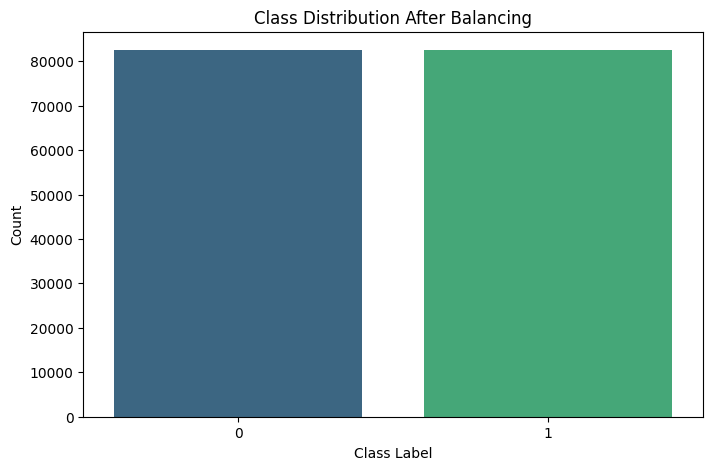

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df["label"], palette="viridis")

# Labels and title
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.title("Class Distribution After Balancing")

# Show the plot
plt.show()

## This cell sets up the environment for model training by importing necessary libraries and disabling tokenizer parallelism to prevent hanging.

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoModel, AutoTokenizer, Trainer, TrainingArguments,
                          BertForSequenceClassification, DataCollatorWithPadding)
import os
from datasets import Dataset

# Disable tokenizer parallelism to prevent hanging
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["WANDB_DISABLED"] = "true"

##  This cell loads the tokenizer and model, defines a preprocessing function, converts the DataFrame to a Dataset, splits it into training and testing sets, tokenizes the dataset, and sets up a data collator for padding.

In [ ]:
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")
sequence_clf_model = BertForSequenceClassification.from_pretrained("asafaya/bert-base-arabic", num_labels=2)

# Define max length
max_length = 300

def preprocess_function(examples):
    tokenized_inputs = tokenizer(examples["cleaned_content"], truncation=True, max_length=max_length)
    tokenized_inputs["labels"] = examples["label"]  # Ensure labels are included
    return tokenized_inputs

# Convert dataframe to Dataset
classification_dataset = Dataset.from_pandas(df)

# Split dataset
classification_dataset = classification_dataset.train_test_split(test_size=0.3)

# Tokenize dataset
seq_clf_tokenized = classification_dataset.map(preprocess_function, batched=True, remove_columns=["cleaned_content", "label"])

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/334k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/115500 [00:00<?, ? examples/s]

Map:   0%|          | 0/49500 [00:00<?, ? examples/s]

In [ ]:
!pip install evaluate
import evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00


`eval_pred` is a tuple containing:
- logits: The raw outputs from the model (before applying softmax).
- labels: The true class labels.

**Logits** are the raw, unnormalized scores that your model outputs before applying a softmax function to convert them into probabilities.

Each row represents a prediction for a single input, and each column corresponds to a class.

For example:

Logits Sample: `[-1.8190521  1.8116069]`
Class 0 score: -1.8190521
Class 1 score: 1.8116069

**Labels** Sample: `[1, 0, 1, 1, 0]` represents the true class labels for the corresponding predictions.

1 means the correct class is Class 1.
0 means the correct class is Class 0.

## This cell defines a function to compute evaluation metrics (accuracy) based on the model's predictions and true labels.

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1) # Get Predicted Classes

    # Debugging >> Print first few logits
    print(f"Logits Sample: {logits[:5]}")
    print(f"Labels Sample: {labels[:5]}")

    accuracy = np.mean(predictions == labels)#creates a boolean array then  Calculates the proportion of correct predictions.
    return {"accuracy": accuracy}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')

    return {
        "accuracy": np.mean(predictions == labels),
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

## يتم في هذه الخلية إنشاء مجموعة فرعية أصغر من مجموعة بيانات التقييم لتقييم أسرع أثناء التدريب

In [ ]:
subset_size = int(len( seq_clf_tokenized["test"])/2)

# Select a random subset of the evaluation dataset
eval_subset = seq_clf_tokenized["test"].shuffle(seed=42).select(range(subset_size))

In [ ]:
## Define training arguments
# -----------------------
epochs = 1 #the number of epochs
training_args = TrainingArguments(
    output_dir="./clf/results",
    num_train_epochs=epochs,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,c
    weight_decay=0.05,
    logging_steps=5,
    log_level='info',
    evaluation_strategy='steps',
    save_strategy='steps',
    eval_steps=5,  # Evaluate every 5 steps
    save_steps=500,  # Save every 500 steps
    fp16=True,
    report_to="none"  # Disable WandB logging
)

# Define trainer يتم تحديد كل التوبيكس ومن ثم بدء عملية التدريب
trainer = Trainer(
    model=sequence_clf_model,
    args=training_args,
    train_dataset=seq_clf_tokenized["train"],
    eval_dataset=eval_subset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)
# Train the model
trainer.train()

In [ ]:
## Define training arguments
# -----------------------
epochs = 1
training_args = TrainingArguments(
    output_dir="./clf/results",
    num_train_epochs=epochs,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    load_best_model_at_end=True,
    weight_decay=0.05,
    logging_steps=5,#1 step = single update of the  parameters
    log_level='info',
    evaluation_strategy='steps',
    save_strategy='steps',
    eval_steps=500,  # Evaluate every 500 steps
    save_steps=500,  # Save every 500 steps
    fp16=True,
    report_to="none"  # Disable WandB logging
)

# Define trainer
trainer = Trainer(
    model=sequence_clf_model,
    args=training_args,
    train_dataset=seq_clf_tokenized["train"],
    eval_dataset=eval_subset,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)
# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
PyTorch: setting up devices
Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: content. If content are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 115,500
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Training with DataParallel so batch size has been adjusted to: 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1,805
  Number of trainable parameters = 110,618,882
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: Use

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
500,0.223600,0.261182,0.911030,0.911540,0.911030,0.911010
1000,0.222600,0.195728,0.922384,0.924267,0.922384,0.922286
1500,0.179900,0.174590,0.931596,0.931797,0.931596,0.931591


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: content. If content are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 24750
  Batch size = 64
Saving model checkpoint to ./clf/results/checkpoint-500
Configuration saved in ./clf/results/checkpoint-500/config.json
Model weights saved in ./clf/results/checkpoint-500/model.safetensors
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: content. If content are not expected by `BertForSequenceClassification.forward`,  you can safely ignor

TrainOutput(global_step=1805, training_loss=0.1709752635240885, metrics={'train_runtime': 2522.4422, 'train_samples_per_second': 45.789, 'train_steps_per_second': 0.716, 'total_flos': 1.030837048240608e+16, 'train_loss': 0.1709752635240885, 'epoch': 1.0})

## فيما يلي  يتم في هذه الخلايا تحميل أفضل نقطة تحقق للنموذج التي تم حفظها أثناء التدريب

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
best_model = trainer.model

best_model_path = "./clf/results/checkpoint-1500"  # the best checkpoint
best_model = AutoModelForSequenceClassification.from_pretrained(best_model_path)


loading configuration file ./clf/results/checkpoint-1500/config.json
Model config BertConfig {
  "_name_or_path": "./clf/results/checkpoint-1500",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.47.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 32000
}

loading weights file ./clf/results/checkpoint-1500/model.safetensors
All model checkpoint weights were used when initializing BertForSequenceCla

In [ ]:
# Run evaluation on test dataset explicitly
test_results = trainer.evaluate(eval_dataset=seq_clf_tokenized["test"])

test_results

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: content. If content are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 49500
  Batch size = 64
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


{'eval_loss': 0.17154347896575928,
 'eval_accuracy': 0.933010101010101,
 'eval_precision': 0.9331713932932488,
 'eval_recall': 0.933010101010101,
 'eval_f1': 0.933005893963128,
 'eval_runtime': 313.4636,
 'eval_samples_per_second': 157.913,
 'eval_steps_per_second': 2.469,
 'epoch': 1.0}